In [1]:
import os
import glob
import random
import time
import sys
import importlib

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)

In [2]:
n_neighbors=100
downsample_step=(60,60)

## 0. Load up all the input and process ~ 4 mins

In [3]:
%load_ext autoreload
%load_ext autotime

detail_result_path = '/Users/pengzhizhang/pseudotime/data/neuro/velocity_result'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail.csv')
load_cellDancer=pd.read_csv(detail_file)
load_cellDancer_valid=load_cellDancer[~load_cellDancer.gene_name.isin(['Cst3','Scd2','Fth1'])]

from compute_cell_velocity import compute_cell_velocity

gene_choice=list(set(load_cellDancer.gene_name))
#gene_choice=['Hba-x']
compute_cell_velocity(
    load_cellDancer=load_cellDancer,
    gene_list=gene_choice,
    mode="gene",
    #transfer_mode='power10',
    n_neighbors=n_neighbors,
    step=downsample_step)

(genes, cells): (2148, 18140)
tranfer mode: None
After downsampling, there are  893 cells.
time: 2min 9s (started: 2022-04-29 16:58:08 -05:00)


In [12]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2
0,0,0610007P14Rik,1.232261,0.072207,1.259473,0.074903,0.064000,0.811681,0.003397,0.060301,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429,0,NaN,NaN
1,1,0610007P14Rik,1.133782,0.078814,1.163397,0.078786,0.063456,0.805846,0.003776,0.060301,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895,1,NaN,NaN
2,2,0610007P14Rik,1.514005,0.135724,1.567264,0.119788,0.078587,0.813846,0.002602,0.060301,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419,2,NaN,NaN
3,3,0610007P14Rik,0.694710,0.067970,0.719411,0.068489,0.054528,0.786969,0.005885,0.060301,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485,3,NaN,NaN
4,4,0610007P14Rik,0.892577,0.113096,0.934898,0.100961,0.064767,0.787270,0.004924,0.060301,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38964715,18135,Zwint,0.628872,0.102383,0.661537,0.112521,0.107899,0.855837,0.035450,0.062125,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668,18135,NaN,NaN
38964716,18136,Zwint,2.242793,0.237419,2.335716,0.236443,0.224360,0.953217,0.018043,0.062125,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788,18136,NaN,NaN
38964717,18137,Zwint,0.279290,0.154337,0.335284,0.164991,0.144815,0.800248,0.041252,0.062125,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364,18137,NaN,NaN
38964718,18138,Zwint,0.697305,0.128248,0.740287,0.132708,0.119159,0.859578,0.034811,0.062125,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549,18138,NaN,NaN


time: 34.8 ms (started: 2022-04-29 12:02:29 -05:00)


# 1. stress test the ``grid`` grid size

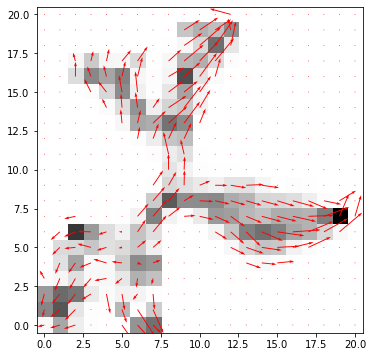

[0 1 2 6 0 1 1 5 0 1 0 0 2 2 5 5 0 0 5 6 0 1 0 0 0 5 0 5 5 5 0 5 5 5 0 1 1
 0 0 0 0 0 0 0 5 2 0 0 1 0 0 0 0 1 0 1 0 5 1 4 2 1 4 2 0 0 2 5 0 3 6 0 0 0
 5 1 2 0 5 0 2 0 0 2 2 2 0 1 1 2 5 0 2 0 0 0 0 2 3 5 1 0 1 1 2 1 5 5 5 5 0
 5 5 0 2 1 2 0 0 2 5 1 2 0 2 0 1 0 3 5 0 5 0 7 2 0 5 0 1 7 3 5 4 6 0 3 0 2
 0 5 4 2 2 5 0 1 3 3 1 0 4 5 2 5 0 5 3 0 2 3 2 0 3 5 0 0 2 1 2 1 3 0 5 5 5
 0 1 0 3 0 2 1 5 0 0 0 6 6 0 5 0 0 1 2 1 0 3 1 5 1 6 5 2 0 5 0 0 1 5 0 6 5
 2 0 1 3 6 5 0 5 0 0 1 0 2 2 0 0 2 2 6 2 1 1 7 0 2 1 1 1 2 2 6 1 5 0 0 2 4
 0 5 5 0 0 1 0 0 5 0 1 1 5 0 5 1 2 2 0 0 4 0 2 0 2 1 0 0 0 0 5 0 7 0 0 1 0
 1 1 5 2 5 1 0 0 0 1 5 5 2 0 0 5 0 0 0 0 5 1 3 5 5 0 2 5 0 3 0 2 3 0 0 5 7
 5 2 7 2 5 0 4 0 0 0 2 0 3 0 0 1 3 3 0 3 1 2 0 1 5 0 2 0 2 2 0 0 0 5 0 4 0
 0 2 5 1 0 1 5 0 5 2 0 5 1 1 0 5 5 3 5 2 5 0 6 2 7 1 0 2 0 1 0 0 0 7 5 0 0
 0 5 5 0 0 3 2 0 0 2 0 2 3 0 3 0 2 3 2 1 2 1 1 0 1 1 1 0 1 0 1 0 1 1 2 0 2
 1 3 1 0 0 1 1 1 3 1 1 0 1 1 3 0 0 0 1 2 1 2 0 3 2 1 1 0 2 0 8 1 1 5 0 0 1
 1 1 0 1 2 0 3 3 2 1 1 1 

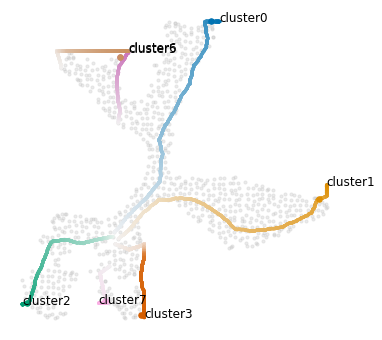




cluster  0
MAX allowed zero time cells are:  13
Only  3  Cells left. Stopping.



cluster  1
MAX allowed zero time cells are:  13
Only  0  Cells left. Stopping.



cluster  2
MAX allowed zero time cells are:  10
Only  1  Cells left. Stopping.



cluster  3
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.



cluster  5
MAX allowed zero time cells are:  10
Only  5  Cells left. Stopping.



cluster  6
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.



cluster  7


IndexError: list index out of range

In [4]:
dt = 0.001
t_total = 10000
n_repeats = 10

grids = [(20,20), (30,30), (40,40), (50,50)]
cell_time_grid = dict()
for grid in grids:
    cell_time_grid[grid] = pseudo_time(embedding, velocity_embedding, sampling_ixs, step,
                                  grid, dt, t_total, n_repeats, 
                                  os.path.join(output_path, "changing_grid"))

In [ ]:
labels = [str(grid[0])+'x'+str(grid[1]) for grid in cell_time_grid]
ctime = np.vstack([cell_time[i] for i in cell_time_grid])
plt.matshow(ctime, cmap='YlGnBu_r', aspect='auto')
plt.yticks(range(len(labels)), labels)
df = pd.DataFrame(ctime.T, columns=labels)
plt.show()

In [ ]:
sns.pairplot(df, kind='kde')

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
hm = sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(236,32, center="light", s=100, n=10), 
            cbar_kws={"shrink": .8, 'format': '%.2f', 'ticks': [0.5,0.75,1]},
            square=True, 
            ax=ax,
            linewidths=.5,
            vmin=0.5, vmax=1, 
            annot=True, annot_kws={"size":20})
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18)

plt.show()

# 2. Stress test the ``dt`` parameter, fixing ``grid = (30,30)``

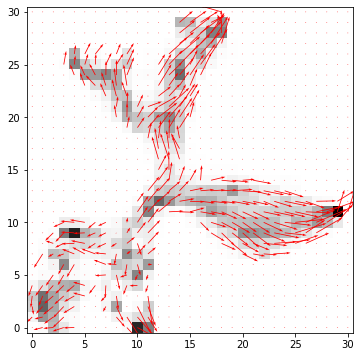

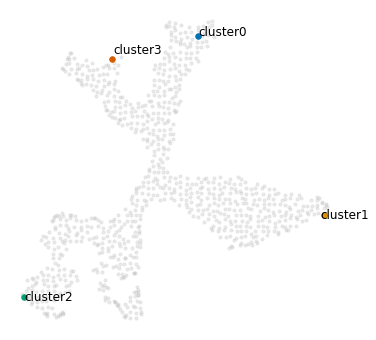

There are 4 clusters.
They are:  [0 1 2 3]



cluster  0
MAX allowed zero time cells are:  31
169  Cells left.


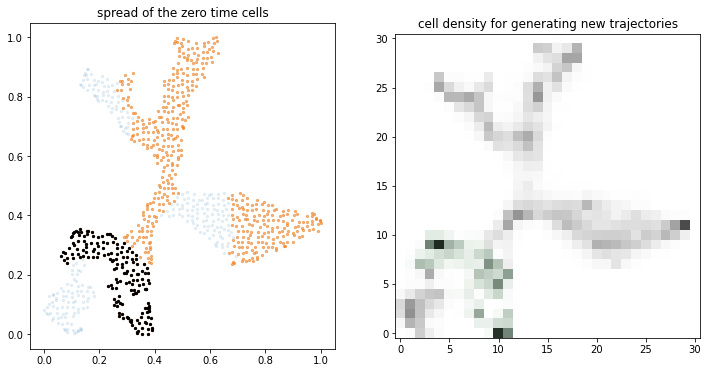

Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.062305706212286295
Between dot 4  from refPath1 and dot 0 from refPath2.


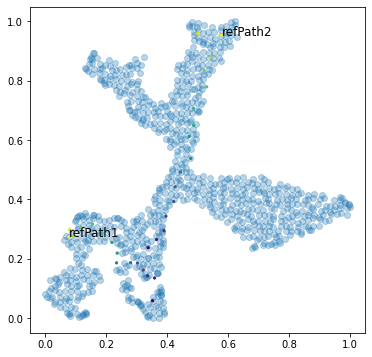

now the cell time is updated for cluster:  0
shifting ref_path2 by time  4



cluster  0
MAX allowed zero time cells are:  31
36  Cells left.


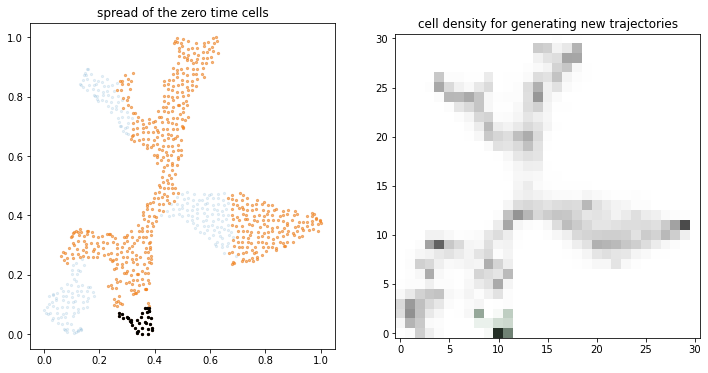

Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.0213040348202551
Between dot 6  from refPath1 and dot 0 from refPath2.


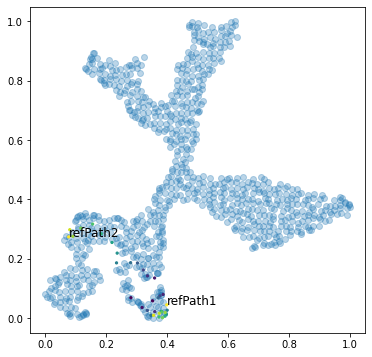

now the cell time is updated for cluster:  0
shifting ref_path2 by time  6



cluster  0
MAX allowed zero time cells are:  31
Only  5  Cells left. Stopping.



cluster  1
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.



cluster  2
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.



cluster  3
MAX allowed zero time cells are:  10
Only  2  Cells left. Stopping.

All intra cluster cell time has been resolved.





Consolidating time between clusters  0  and  1 




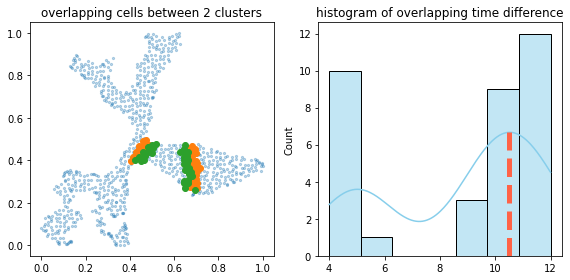

shift time is:  11 .
 The overlapping cells are:
 cell  153  from cluster  0  and  141  from cluster  1


Consolidating time between clusters  0  and  2 




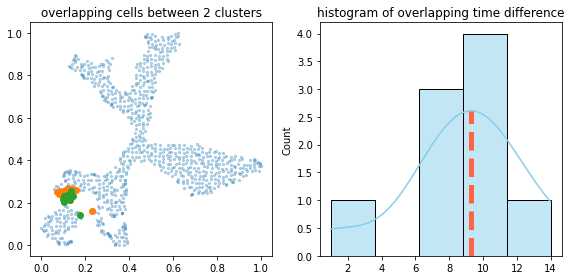

shift time is:  10 .
 The overlapping cells are:
 cell  102  from cluster  0  and  181  from cluster  2


Consolidating time between clusters  0  and  3 




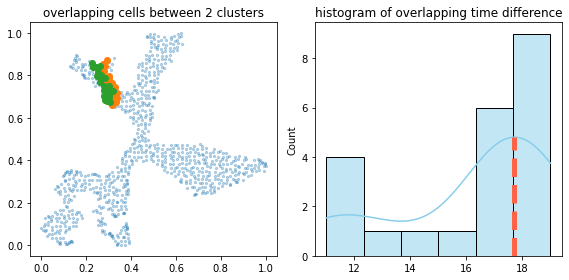

shift time is:  18 .
 The overlapping cells are:
 cell  81  from cluster  0  and  40  from cluster  3


Consolidating time between clusters  1  and  2 


No close cells between clusters	 (1, 2)


Consolidating time between clusters  1  and  3 


No close cells between clusters	 (1, 3)


Consolidating time between clusters  2  and  3 


No close cells between clusters	 (2, 3)


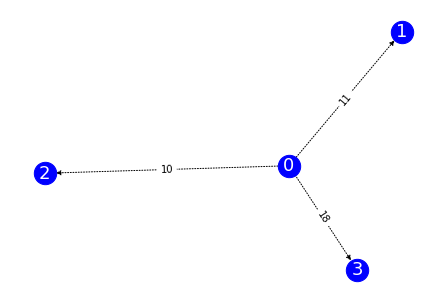




Plotting estimated pseudotime for all cells ...


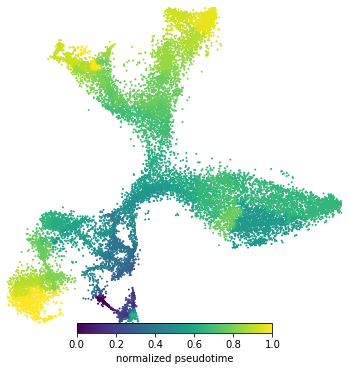

There are 881 cells.


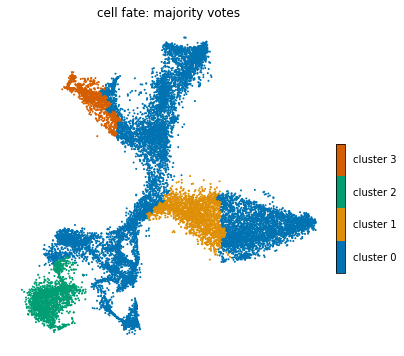


Exporting data to:
  /Users/pengzhizhang/pseudotime/data/neuro/pseudotime_result/changing_dt/pseudo_time_neuro_combined__grid30x30__dt0.1__ttotal100__nrepeats10.csv
--- 10.232152223587036 seconds ---


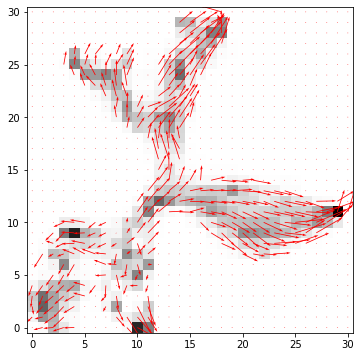

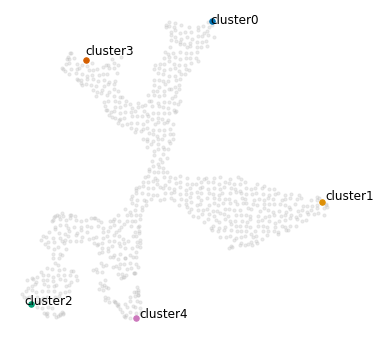

There are 5 clusters.
They are:  [0 1 2 3 4]



cluster  0
MAX allowed zero time cells are:  21
49  Cells left.


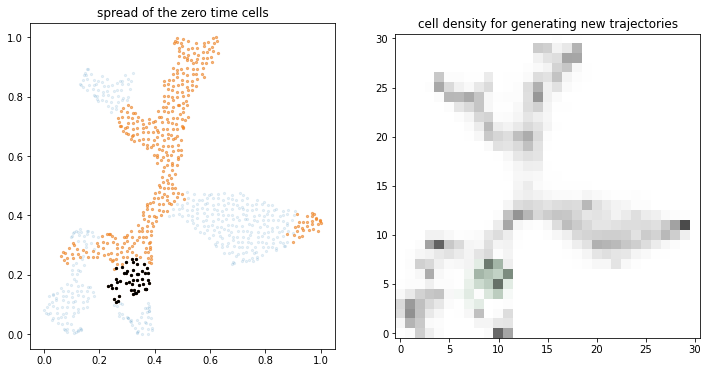

Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.04516499982428665
Between dot 0  from refPath1 and dot 0 from refPath2.


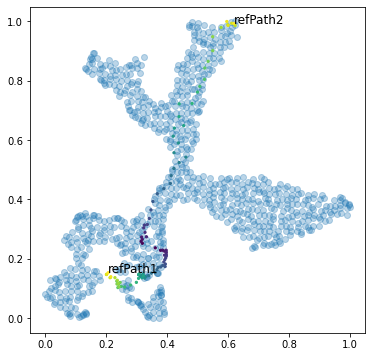

now the cell time is updated for cluster:  0
shifting ref_path2 by time  0



cluster  0
MAX allowed zero time cells are:  21
Only  11  Cells left. Stopping.



cluster  1
MAX allowed zero time cells are:  11
Only  0  Cells left. Stopping.



cluster  2
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.



cluster  3
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.



cluster  4
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.

All intra cluster cell time has been resolved.





Consolidating time between clusters  0  and  1 




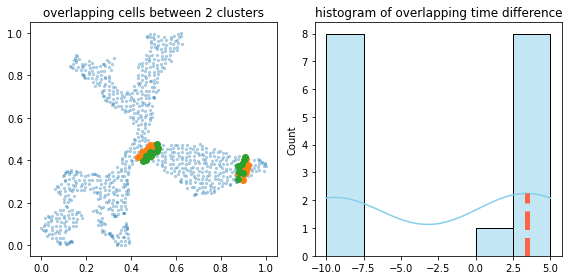

shift time is:  0 .
 The overlapping cells are:
 cell  282  from cluster  0  and  162  from cluster  1


Consolidating time between clusters  0  and  2 




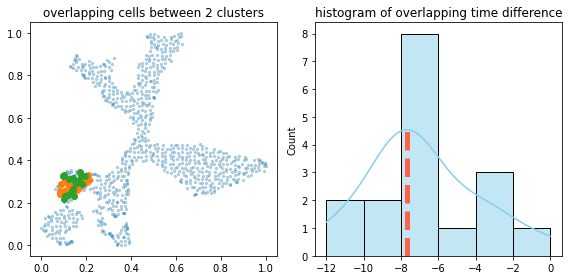

shift time is:  0 .
 The overlapping cells are:
 cell  104  from cluster  0  and  377  from cluster  2


Consolidating time between clusters  0  and  3 




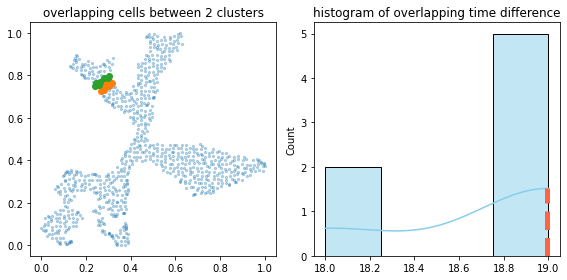

shift time is:  19 .
 The overlapping cells are:
 cell  23  from cluster  0  and  270  from cluster  3


Consolidating time between clusters  0  and  4 




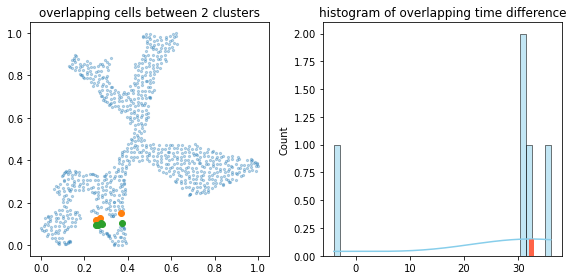

shift time is:  32 .
 The overlapping cells are:
 cell  816  from cluster  0  and  653  from cluster  4


Consolidating time between clusters  1  and  2 


No close cells between clusters	 (1, 2)


Consolidating time between clusters  1  and  3 


No close cells between clusters	 (1, 3)


Consolidating time between clusters  1  and  4 


No close cells between clusters	 (1, 4)


Consolidating time between clusters  2  and  3 


No close cells between clusters	 (2, 3)


Consolidating time between clusters  2  and  4 


No close cells between clusters	 (2, 4)


Consolidating time between clusters  3  and  4 


No close cells between clusters	 (3, 4)


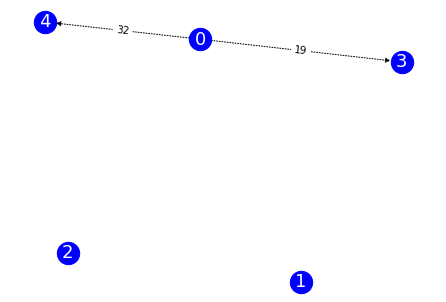




Plotting estimated pseudotime for all cells ...


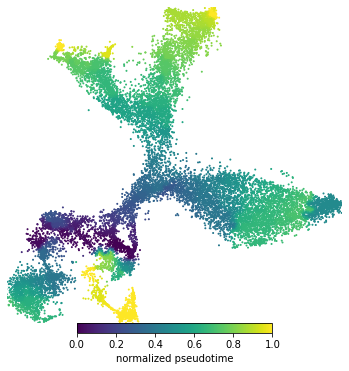

There are 881 cells.


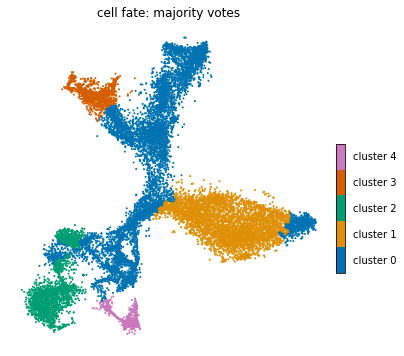


Exporting data to:
  /Users/pengzhizhang/pseudotime/data/neuro/pseudotime_result/changing_dt/pseudo_time_neuro_combined__grid30x30__dt0.05__ttotal200__nrepeats10.csv
--- 11.91391921043396 seconds ---


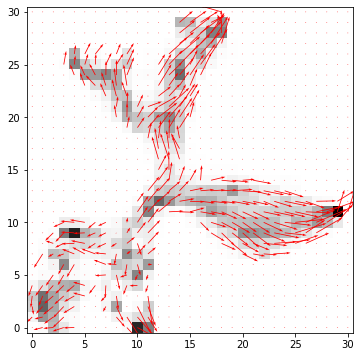

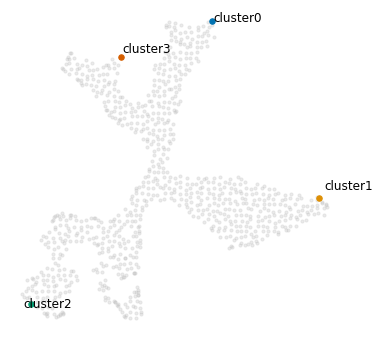

There are 4 clusters.
They are:  [0 1 2 3]



cluster  0
MAX allowed zero time cells are:  18
78  Cells left.


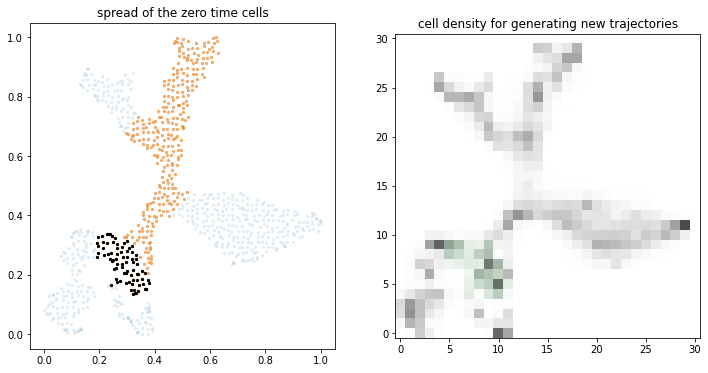

Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.09796740453954407
Between dot 0  from refPath1 and dot 0 from refPath2.


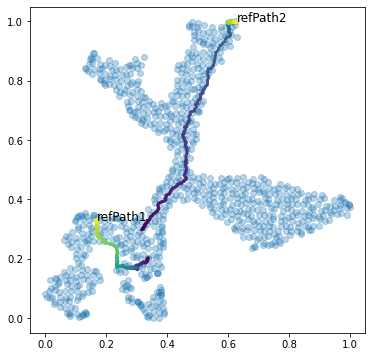

now the cell time is updated for cluster:  0
shifting ref_path2 by time  0



cluster  0
MAX allowed zero time cells are:  18
Only  12  Cells left. Stopping.



cluster  1
MAX allowed zero time cells are:  12
Only  0  Cells left. Stopping.



cluster  2
MAX allowed zero time cells are:  10
Only  7  Cells left. Stopping.



cluster  3
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.

All intra cluster cell time has been resolved.





Consolidating time between clusters  0  and  1 




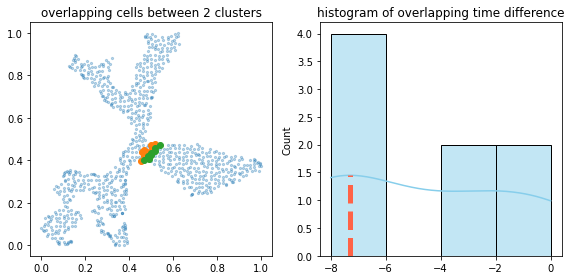

shift time is:  0 .
 The overlapping cells are:
 cell  272  from cluster  0  and  860  from cluster  1


Consolidating time between clusters  0  and  2 




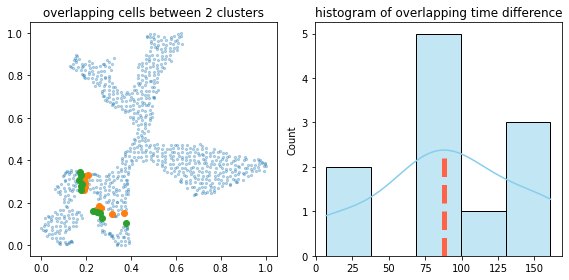

shift time is:  88 .
 The overlapping cells are:
 cell  774  from cluster  0  and  136  from cluster  2


Consolidating time between clusters  0  and  3 




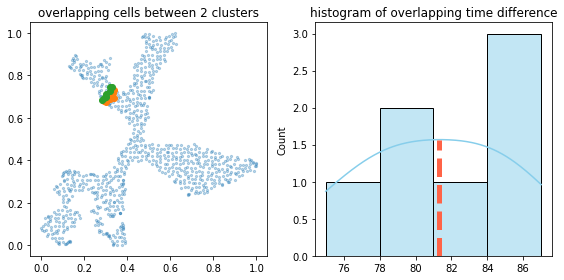

shift time is:  81 .
 The overlapping cells are:
 cell  372  from cluster  0  and  133  from cluster  3


Consolidating time between clusters  1  and  2 


No close cells between clusters	 (1, 2)


Consolidating time between clusters  1  and  3 


No close cells between clusters	 (1, 3)


Consolidating time between clusters  2  and  3 


No close cells between clusters	 (2, 3)


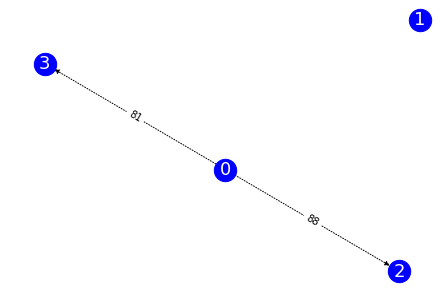




Plotting estimated pseudotime for all cells ...


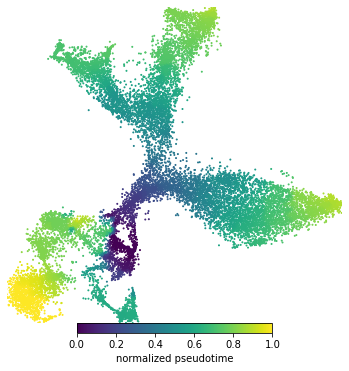

There are 881 cells.


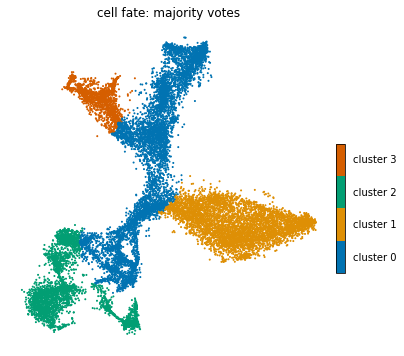


Exporting data to:
  /Users/pengzhizhang/pseudotime/data/neuro/pseudotime_result/changing_dt/pseudo_time_neuro_combined__grid30x30__dt0.01__ttotal1000__nrepeats10.csv
--- 26.03099489212036 seconds ---


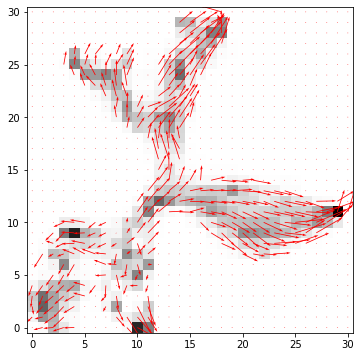

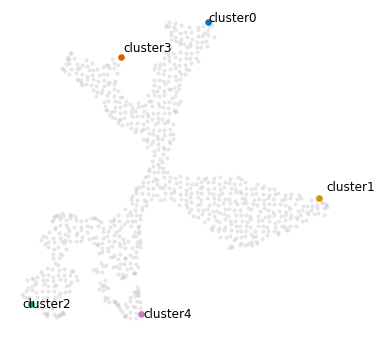

There are 5 clusters.
They are:  [0 1 2 3 4]



cluster  0
MAX allowed zero time cells are:  19
60  Cells left.


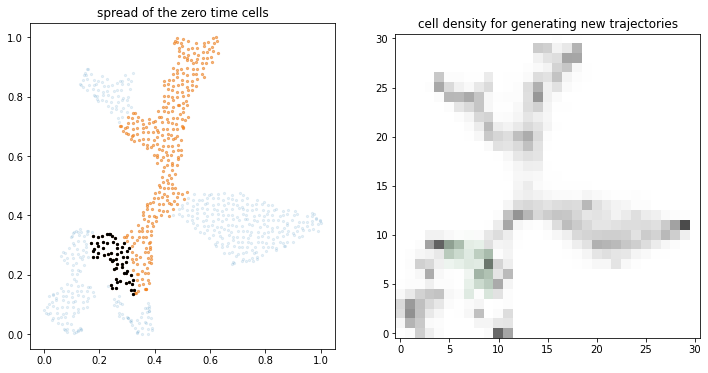

Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.09238241795342021
Between dot 164  from refPath1 and dot 0 from refPath2.


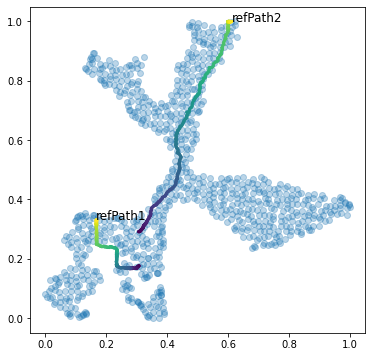

now the cell time is updated for cluster:  0
shifting ref_path2 by time  164



cluster  0
MAX allowed zero time cells are:  19
Only  4  Cells left. Stopping.



cluster  1
MAX allowed zero time cells are:  12
Only  0  Cells left. Stopping.



cluster  2
MAX allowed zero time cells are:  10
Only  2  Cells left. Stopping.



cluster  3
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.



cluster  4
MAX allowed zero time cells are:  10
Only  1  Cells left. Stopping.

All intra cluster cell time has been resolved.





Consolidating time between clusters  0  and  1 




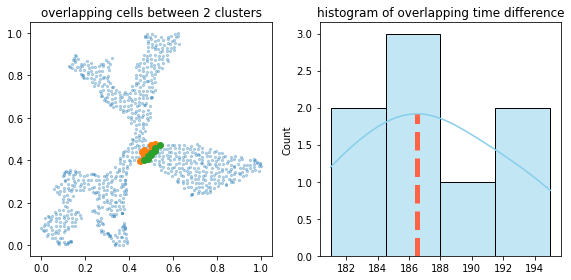

shift time is:  186 .
 The overlapping cells are:
 cell  257  from cluster  0  and  343  from cluster  1


Consolidating time between clusters  0  and  2 




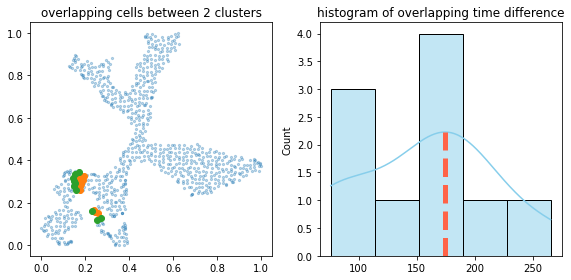

shift time is:  171 .
 The overlapping cells are:
 cell  307  from cluster  0  and  169  from cluster  2


Consolidating time between clusters  0  and  3 




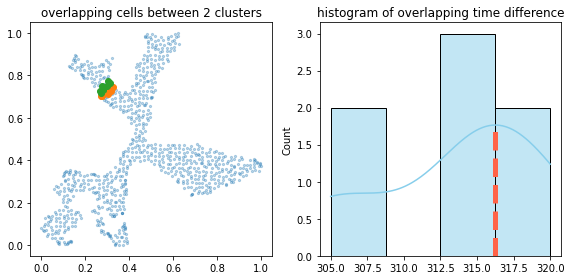

shift time is:  316 .
 The overlapping cells are:
 cell  179  from cluster  0  and  175  from cluster  3


Consolidating time between clusters  0  and  4 


shift time is:  158 .
 The overlapping cells are:
 cell  159  from cluster  0  and  197  from cluster  4


Consolidating time between clusters  1  and  2 


No close cells between clusters	 (1, 2)


Consolidating time between clusters  1  and  3 


No close cells between clusters	 (1, 3)


Consolidating time between clusters  1  and  4 


No close cells between clusters	 (1, 4)


Consolidating time between clusters  2  and  3 


No close cells between clusters	 (2, 3)


Consolidating time between clusters  2  and  4 


shift time is:  0 .
 The overlapping cells are:
 cell  527  from cluster  2  and  126  from cluster  4


Consolidating time between clusters  3  and  4 


No close cells between clusters	 (3, 4)


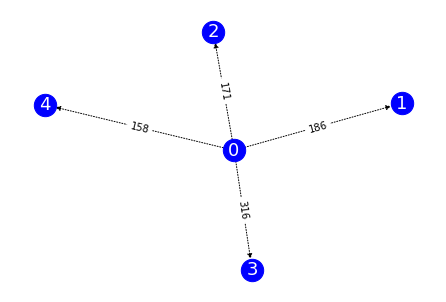




Plotting estimated pseudotime for all cells ...


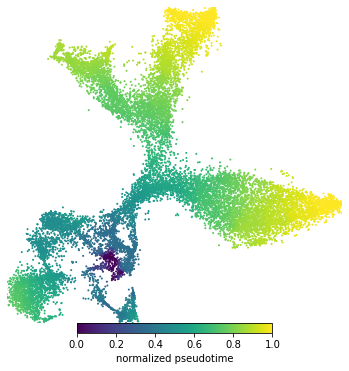

There are 881 cells.


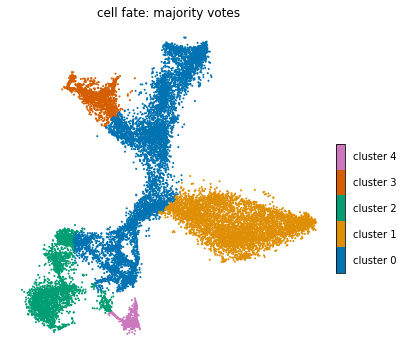


Exporting data to:
  /Users/pengzhizhang/pseudotime/data/neuro/pseudotime_result/changing_dt/pseudo_time_neuro_combined__grid30x30__dt0.005__ttotal2000__nrepeats10.csv
--- 43.37785983085632 seconds ---


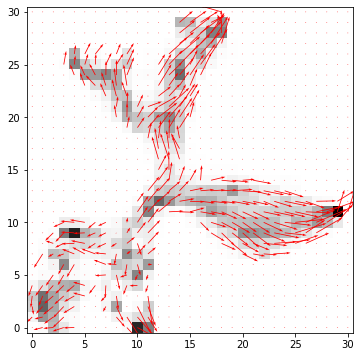

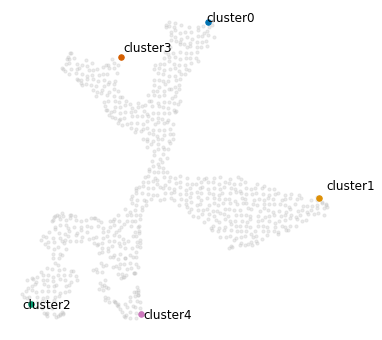

There are 5 clusters.
They are:  [0 1 2 3 4]



cluster  0
MAX allowed zero time cells are:  19
97  Cells left.


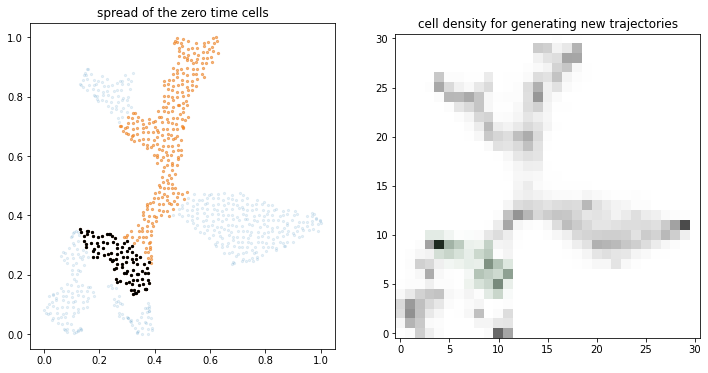

Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.10426386442667097
Between dot 997  from refPath1 and dot 0 from refPath2.


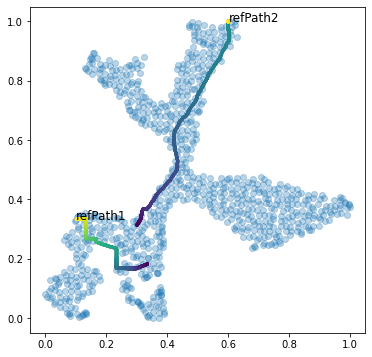

now the cell time is updated for cluster:  0
shifting ref_path2 by time  997



cluster  0
MAX allowed zero time cells are:  19
19  Cells left.


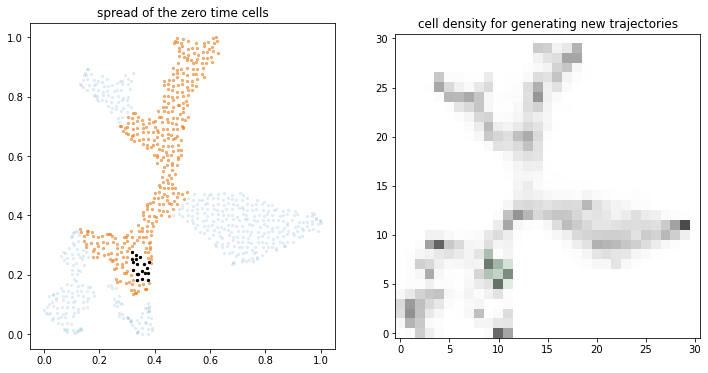

Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.07099881877895378
Between dot 0  from refPath1 and dot 0 from refPath2.


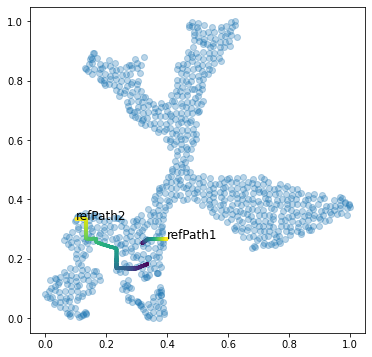

now the cell time is updated for cluster:  0
shifting ref_path2 by time  0



cluster  0
MAX allowed zero time cells are:  19
Only  7  Cells left. Stopping.



cluster  1
MAX allowed zero time cells are:  12
Only  0  Cells left. Stopping.



cluster  2
MAX allowed zero time cells are:  10
Only  3  Cells left. Stopping.



cluster  3
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.



cluster  4
MAX allowed zero time cells are:  10
Only  1  Cells left. Stopping.

All intra cluster cell time has been resolved.





Consolidating time between clusters  0  and  1 




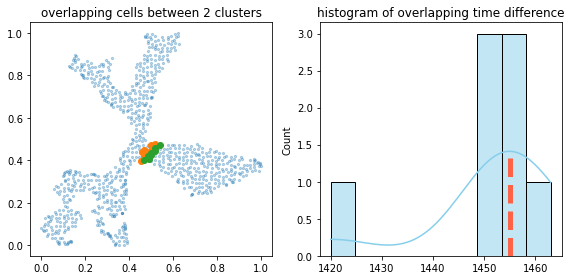

shift time is:  1455 .
 The overlapping cells are:
 cell  34  from cluster  0  and  823  from cluster  1


Consolidating time between clusters  0  and  2 




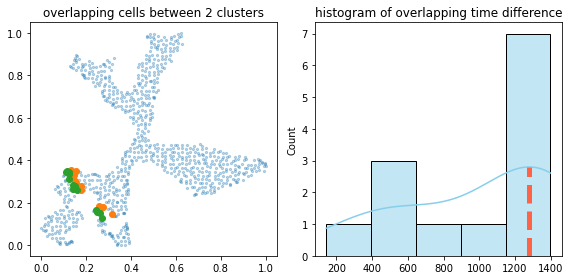

shift time is:  1311 .
 The overlapping cells are:
 cell  818  from cluster  0  and  773  from cluster  2


Consolidating time between clusters  0  and  3 




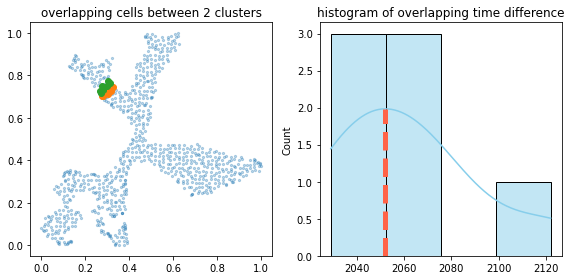

shift time is:  2057 .
 The overlapping cells are:
 cell  243  from cluster  0  and  127  from cluster  3


Consolidating time between clusters  0  and  4 


shift time is:  0 .
 The overlapping cells are:
 cell  159  from cluster  0  and  197  from cluster  4


Consolidating time between clusters  1  and  2 


No close cells between clusters	 (1, 2)


Consolidating time between clusters  1  and  3 


No close cells between clusters	 (1, 3)


Consolidating time between clusters  1  and  4 


No close cells between clusters	 (1, 4)


Consolidating time between clusters  2  and  3 


No close cells between clusters	 (2, 3)


Consolidating time between clusters  2  and  4 


shift time is:  0 .
 The overlapping cells are:
 cell  527  from cluster  2  and  126  from cluster  4


Consolidating time between clusters  3  and  4 


No close cells between clusters	 (3, 4)


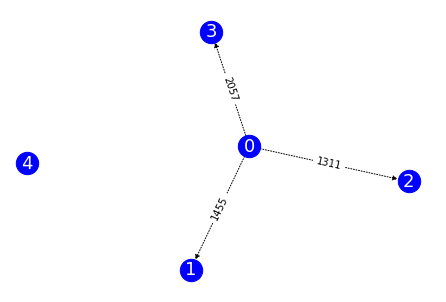




Plotting estimated pseudotime for all cells ...


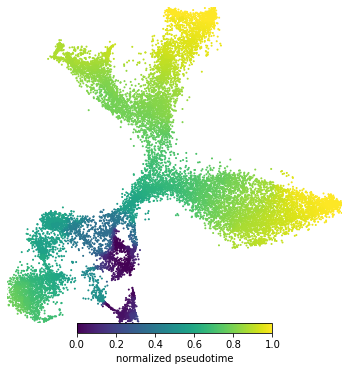

There are 881 cells.


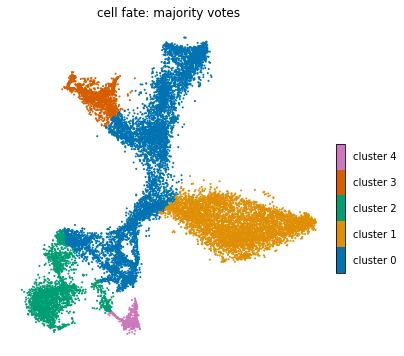


Exporting data to:
  /Users/pengzhizhang/pseudotime/data/neuro/pseudotime_result/changing_dt/pseudo_time_neuro_combined__grid30x30__dt0.001__ttotal10000__nrepeats10.csv
--- 204.06054592132568 seconds ---


In [49]:
importlib.reload(sys.modules['pseudo_time'])
from pseudo_time import *

cell_time = dict()
dts = [0.001, 0.005, 0.01, 0.05, 0.1]
t_total = {dt:int(10/dt) for dt in dts} 
n_repeats = 10
grid = (30,30)
for dt in dts[::-1]:
    cell_time[dt] = pseudo_time(embedding, velocity_embedding, sampling_ixs, step,
                                  grid, dt, t_total[dt], n_repeats, 
                                  os.path.join(output_path, "changing_dt"))

There are 4 clusters.
They are:  [0 1 2 3]



cluster  0
MAX allowed zero time cells are:  24
140  Cells left.


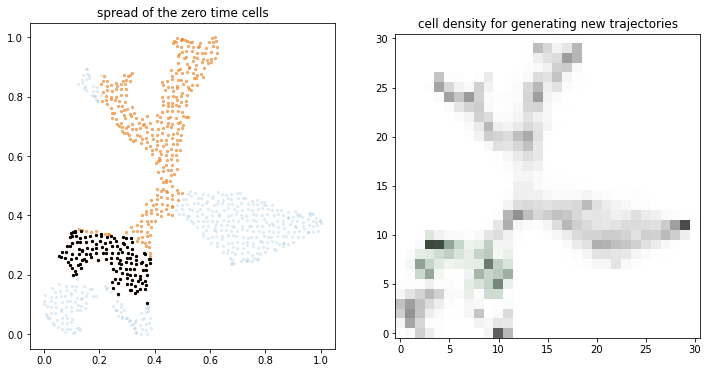

Sampling new trajectories for zero-time cells in cluster  0   ...


TypeError: run_diffusion() got an unexpected keyword argument 'grid_density'

time: 2min 50s (started: 2022-04-29 17:08:19 -05:00)


In [4]:
#%autoreload 2
from pseudo_time import pseudo_time

dt = 0.001
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (30,30)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], n_repeats, downsample_step)

In [15]:
pseudo_time

<function pseudo_time.pseudo_time(embedding, velocity_embedding, sampling_ixs, downsample_step, grid, dt, t_total, n_repeats, output_path)>

time: 3.17 ms (started: 2022-04-29 16:52:18 -05:00)


In [16]:
del pseudo_time

time: 1.18 ms (started: 2022-04-29 16:55:56 -05:00)
